# PolluVision Project - YOLOv8 Medium
---------------------------------------------

##1. Install Ultralytics using pip


In [ ]:
!pip install ultralytics

___________________________________
##2. Imports Necessary Libraries

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display

!yolo checks

Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.9/166.8 GB disk)

OS                  Linux-5.15.120+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 51.00 GB
CPU                 Intel Xeon 2.20GHz
CUDA                11.8

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.3>=1.4.1
torch               ✅ 2.1.0+cu118>=1.8.0
torchvision         ✅ 0.16.0+cu118>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


------------------------
##3. Import the Dataset from Roboflow Website

In [ ]:
# Import Roboflow to use the dataset
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="wBhhcFexJ3QDDrx6zu0d")
project = rf.workspace("sdaia-xqoon").project("capstone-avmph")
dataset = project.version(8).download("yolov8")

-------------
## 4. Model Train
Uses the `!yolo` command-line interface to execute YOLO for object detection. Here's a breakdown of the parameters used:

- `task=detect`: Specifies the task as object detection.
- `mode=train`: Runs the detection in the training mode.
- `model=yolov8m.pt`: Uses the YOLOv8m model for detection.
- `data=/content/Capstone-8/data.yaml`: Specifies the data configuration file path.
- `epochs=100`: Sets the number of training epochs to 100.
- `imgsz=640`: Defines the input image size as 640x640 pixels.
- `conf=0.45`: Sets the confidence threshold to 0.45 for object detection.
- `iou=0.4`: Sets the IoU (Intersection over Union) threshold to 0.4 for object detection.

This command will execute YOLOv8m for object detection based on the specified configurations and parameters. Adjustments to these parameters can affect the model's performance and accuracy in detecting objects within images.


In [ ]:
# Command to run YOLO for object detection
!yolo task=detect mode=train model= yolov8m.pt data= /content/Capstone-8/data.yaml epochs=100 imgsz=640 conf =0.45 iou= 0.4

Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Capstone-8/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.45, iou=0.4, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=No

---
## 5. Model Validation

Explanation of the code:

1. `path_best_weights="/content/runs/detect/train2/weights/best.pt"`: This line defines the variable `path_best_weights` with the path to the best weights of the YOLO model. This file likely contains the learned parameters that achieved the best performance during training.

2. `model = YOLO(path_best_weights)`: Creates an instance of the YOLO object and loads the YOLO model using the specified best weights file located at `path_best_weights`.

3. `model.val()`: Invokes the `val()` method on the `model` object. The `val()` method is likely used for validation or evaluation of the model's performance on a validation dataset. This step evaluates the model's accuracy, precision, or other performance metrics using the loaded best weights.

This code snippet demonstrates the process of initializing a YOLO model object with pre-trained weights and performing a validation step to assess the model's performance using those weights. Adjustments or enhancements to the validation process may involve modifications to the `val()` method depending on the specific implementation within the `YOLO` class.


In [ ]:
# Define the path to the best weights of the YOLO model
path_best_weights="/content/runs/detect/train2/weights/best.pt"

# Create a YOLO object and load the model with the best weights
model = YOLO(path_best_weights)

# Perform validation using the loaded model
model.val()

Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 218 layers, 25844971 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/Capstone-8/valid/labels.cache... 1048 images, 18 backgrounds, 0 corrupt: 100%|██████████| 1048/1048 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 357, len(boxes) = 1985. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:12<00:00,  5.39it/s]


                   all       1048       1985       0.35      0.327      0.303      0.157
         bad_billboard       1048        135      0.523      0.481      0.408      0.203
        broken_signage       1048          2      0.128        0.5      0.496      0.248
      clutter_sidewalk       1048         97      0.129     0.0581     0.0615       0.04
     construction_road       1048        301      0.683      0.708      0.696       0.44
    construction_waste       1048        247      0.322      0.457      0.318      0.142
               garbage       1048        698      0.295      0.226      0.185     0.0733
              graffiti       1048        356       0.53      0.419      0.396      0.187
              potholes       1048         38      0.271     0.0789     0.0763     0.0412
          sand_on_road       1048        111      0.273      0.018     0.0951     0.0435
Speed: 0.3ms preprocess, 6.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ad604402ce0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

----
##6. Model Prediction

Explanation of the parameters used in the command:

- `task=detect`: Specifies the task as object detection.
- `mode=predict`: Runs the detection in prediction mode.
- `model=/content/runs/detect/train2/weights/best.pt`: Specifies the path of the trained model weights for the prediction.
- `source=/content/Capstone-8/test/images`: Sets the source directory where images for prediction are located.
- `conf=0.45`: Sets the confidence threshold to 0.45 for object detection.

This command executes YOLO in prediction mode using a specific trained model (`best.pt`) located in the specified directory. It runs object detection on images located in the `/content/Capstone-8/test/images` directory and sets the confidence threshold for object detection to 0.45. Adjusting the confidence threshold might affect the number of detected objects based on their confidence scores.


In [ ]:
# Command to run YOLO for object detection prediction
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt source= /content/Capstone-8/test/images conf=0.45

Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 218 layers, 25844971 parameters, 0 gradients, 78.7 GFLOPs

image 1/524 /content/Capstone-8/test/images/0019a9ab6fd5ef3df915241bc323afb5_jpg.rf.d69b763eff2cb92aa4d9b057550d88b3.jpg: 640x640 1 construction_road, 9.1ms
image 2/524 /content/Capstone-8/test/images/00777add05cbc205d216d5b502706c8a_jpg.rf.eb2282bdc76dd595d3ca45b6d1ae1cd3.jpg: 640x640 (no detections), 9.1ms
image 3/524 /content/Capstone-8/test/images/0081af04e33fda23cb1d2da07b994200_jpg.rf.eaec5d973d4ee894c4e308f1b512e2fb.jpg: 640x640 (no detections), 9.1ms
image 4/524 /content/Capstone-8/test/images/011bccfbe1b4e9add18b4e9e1165ca2d_jpg.rf.b0569fdeaaa020344205dfd09ca9c018.jpg: 640x640 (no detections), 9.1ms
image 5/524 /content/Capstone-8/test/images/01a9b1fd0b4ecd07e4e232092208a86f_jpg.rf.a82b73e0a105aa3d41badb9c69aac8ab.jpg: 640x640 (no detections), 9.1ms
image 6/524 /content/Capstone-8/test/images/0214b

---
## 7. Importing necessary libraries for image processing and visualization


In [ ]:
# OpenCV for computer vision tasks and image processing
import cv2 as cv

# Operating system module for file and directory handling
import os

# Random module for generating random numbers and performing random operations
import random

# Matplotlib's image module for working with images
import matplotlib.image as mpimg

# Seaborn for data visualization, setting the style to 'darkgrid'
import seaborn as sns
sns.set_style('darkgrid')

# Magic command for inline plotting in Jupyter Notebooks
%matplotlib inline

# Python Imaging Library (PIL) for image manipulation
from PIL import Image

# Matplotlib for plotting and visualization
import matplotlib.pyplot as plt
%matplotlib inline

### 7.1. Plots the train and validation losses for box and class predictions across epochs.

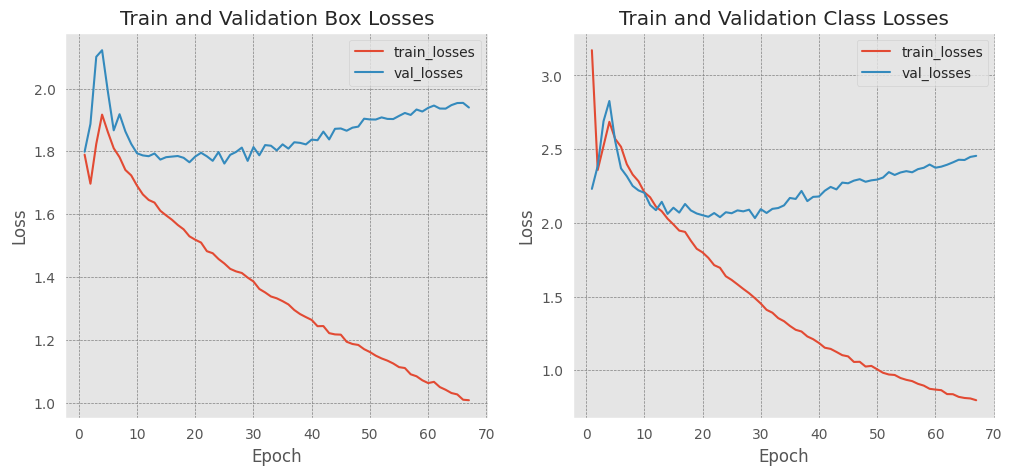

In [ ]:
# Pandas for data manipulation and analysis
import pandas as pd

# Reading the results CSV file containing training/validation losses
result = pd.read_csv('/content/runs/detect/train2/results.csv')

# Displaying the first few rows of the loaded CSV data
result.head()

# Stripping whitespace from column names for consistency
result.columns = result.columns.str.strip()

# Extracting necessary columns for plotting
epoch_column = result['epoch']
box_train_losses = result['train/box_loss']
box_val_losses = result['val/box_loss']
cls_train_losses = result['train/cls_loss']
cls_val_losses = result['val/cls_loss']


# Plotting the train and validation losses
plt.figure(figsize=(12,5))
plt.style.use('ggplot')  # Choosing a style for the plot (you can use a different style)
plt.subplot(1,2,1)
plt.plot(epoch_column, box_train_losses, label='train_losses')
plt.plot(epoch_column, box_val_losses, label='val_losses')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray') # Adding a grid
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Box Losses')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch_column, cls_train_losses, label='train_losses')
plt.plot(epoch_column, cls_val_losses, label='val_losses')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray') # Adding a grid
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Class Losses')
plt.legend()
plt.show()

### 7.2. Reading and displaying an images

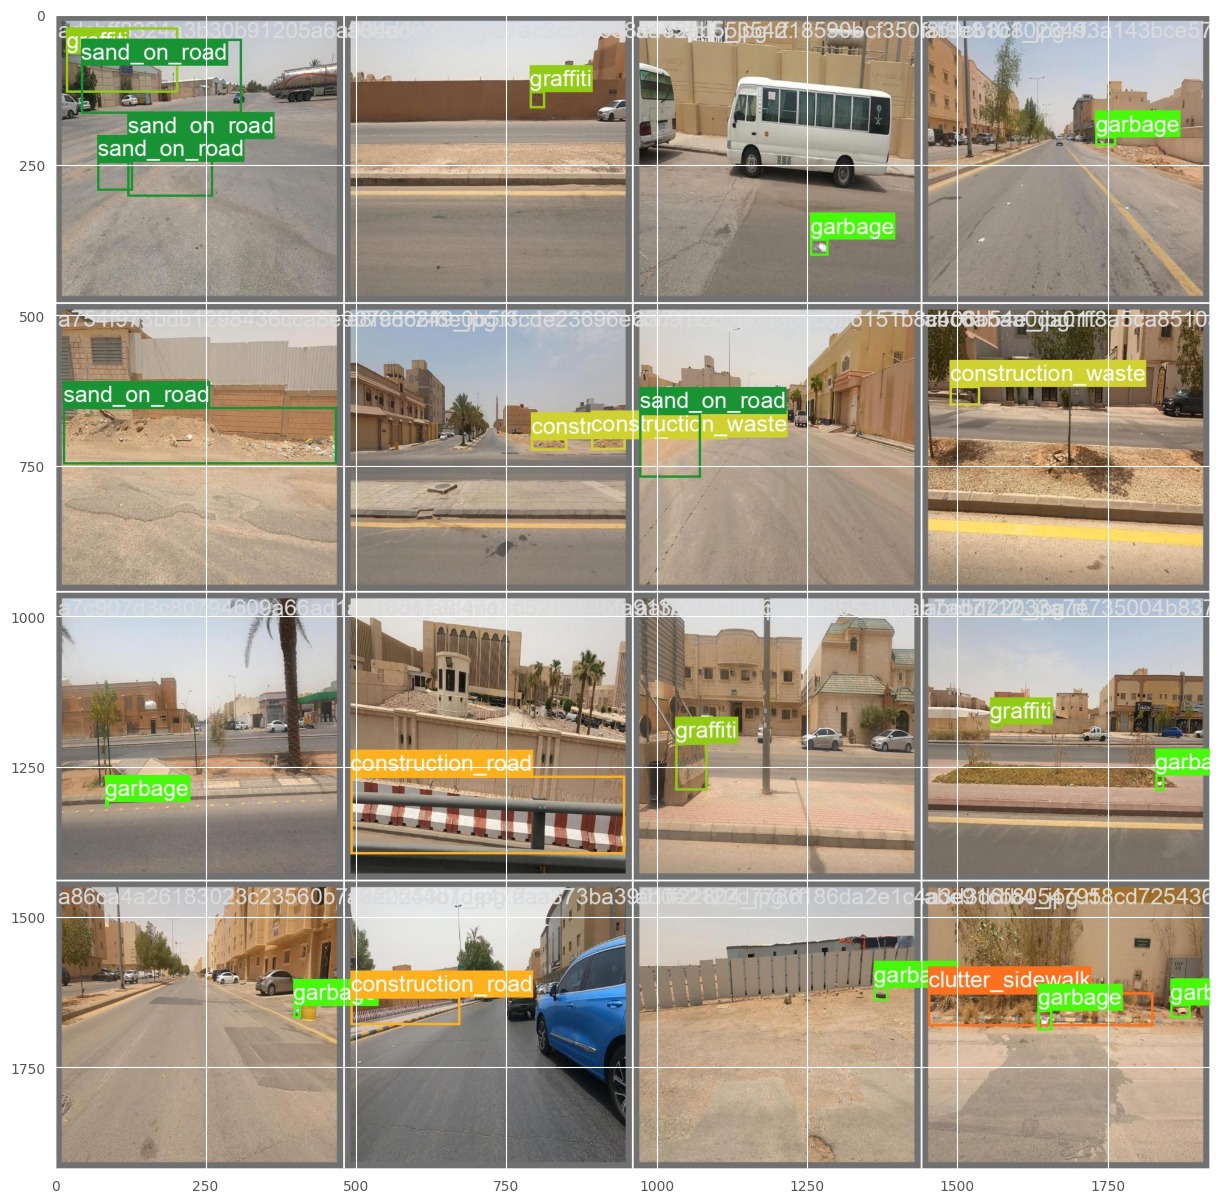

In [ ]:
# Read an image using OpenCV from the specified file path
img = cv.imread("/content/runs/detect/train2/val_batch1_labels.jpg")

# Convert the color space of the image from BGR to RGB
img_cvt=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Set the figure size
plt.figure(figsize=(15, 15))

# Display the image
plt.imshow(img_cvt)

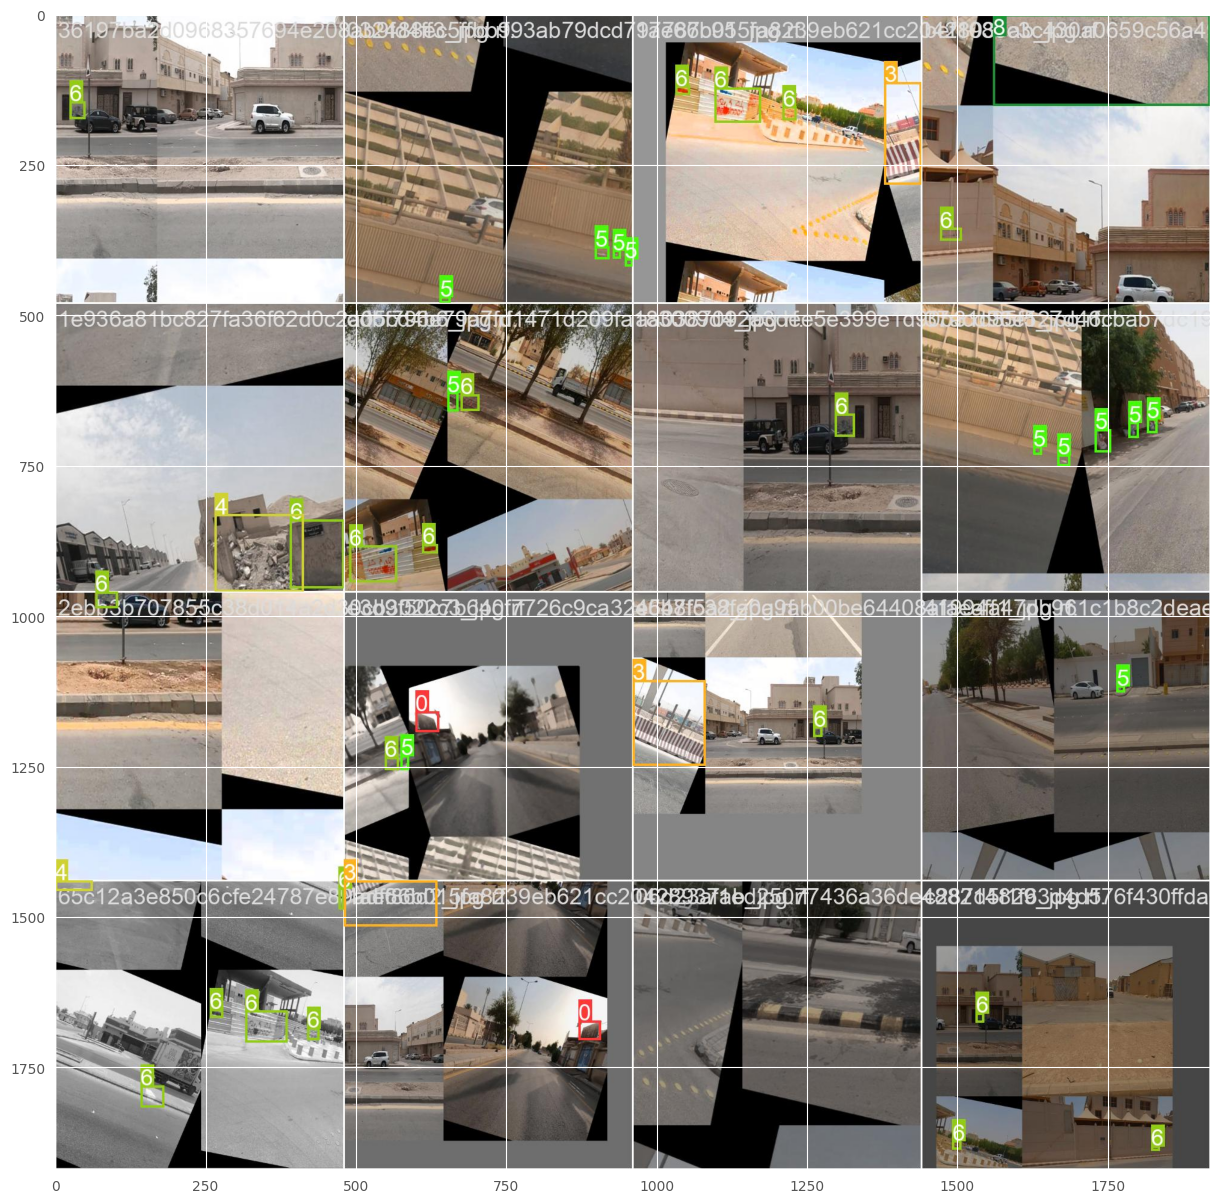

In [ ]:
img = cv.imread("/content/runs/detect/train2/train_batch1.jpg")
img_cvt=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15, 15))
plt.imshow(img_cvt)

### 7.3. Visualize the Predicted Images

In [ ]:
# pollu_detect function takes the path to an image file as an argument and performs pollution detection using a pre-trained model.
def pollu_detect(img_path):

    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()

    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 640x640 2 graffitis, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 construction_road, 9.2ms
Speed: 2.2ms preprocess, 9.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 garbages, 9.2ms
Speed: 2.2ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 construction_road, 9.1ms
Speed: 2.1ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 bad_billboard, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 garbage, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 construction_waste, 3 garbages, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 garbage, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 1.

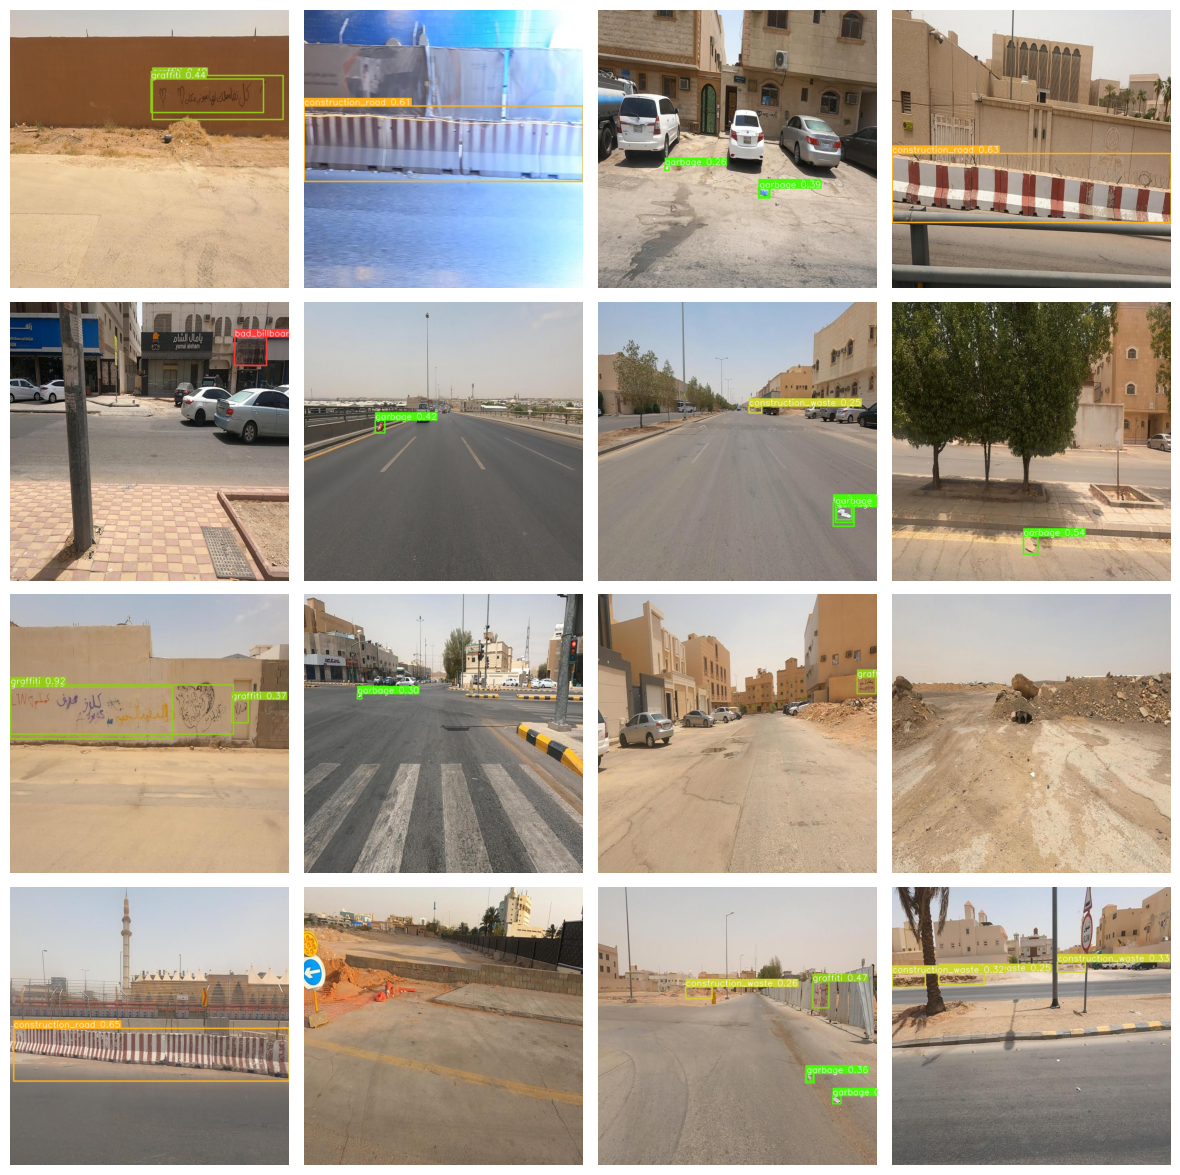

In [ ]:
# Iterates over the images, loads each image, performs pollution detection using `pollu_detect()`, and displays the detected images on the corresponding subplots.

import random

#Define the directory where the custom images are stored
custom_image_dir = '/content/Capstone-8/test/images'

#Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

#Select 16 random images from the list
selected_images = random.sample(image_files, 16)

#Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

#Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = pollu_detect(img_path)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

#Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)